In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold

In [2]:
# Read the train and test data
train=pd.read_csv("weatherAUS.csv")
# test=pd.read_csv("test_2nAIblo.csv")

In [3]:
train.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [4]:
train.dtypes


Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [5]:
train.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [6]:
train.shape

(145460, 24)

In [7]:
train.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RISK_MM           681
RainTomorrow        2
dtype: int64

In [8]:
# Univariate Analysis

In [9]:
train.RainTomorrow.value_counts(normalize=True)

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64

In [10]:
# Around 77% trainee have no rain

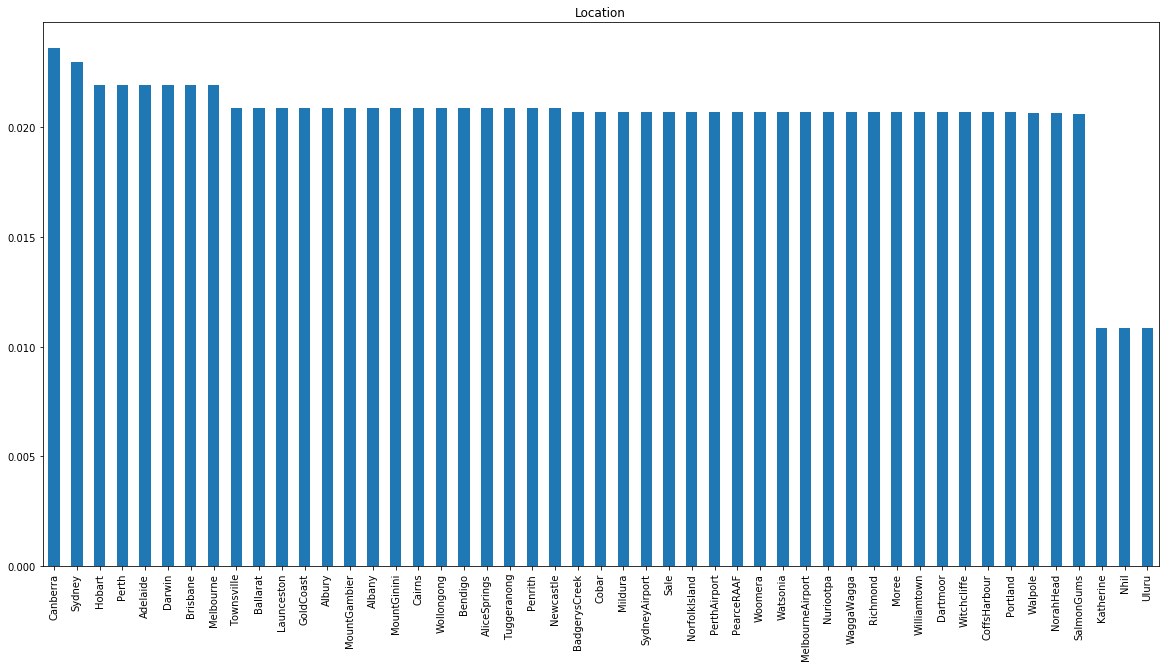

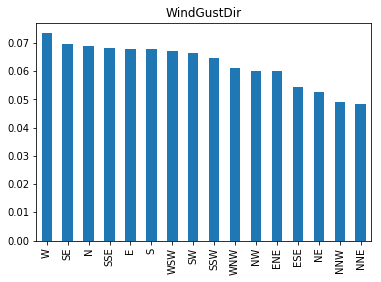

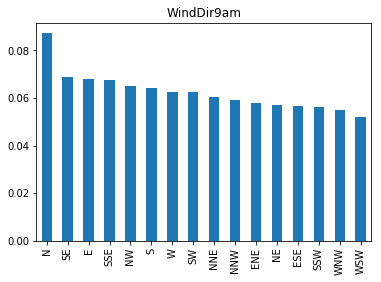

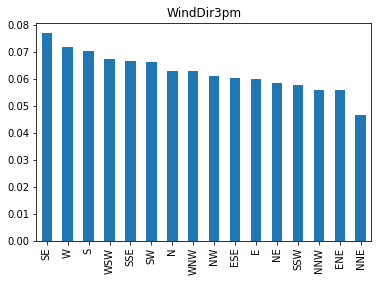

In [11]:
train['Location'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Location')
plt.show()


train['WindGustDir'].value_counts(normalize=True).plot.bar(title= 'WindGustDir')
plt.show()

train['WindDir9am'].value_counts(normalize=True).plot.bar(title= 'WindDir9am')
plt.show()


train['WindDir3pm'].value_counts(normalize=True).plot.bar(title= 'WindDir3pm')
plt.show()


In [12]:
df=train.dropna()

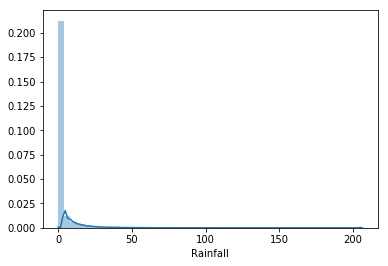

In [13]:
sns.distplot(df['Rainfall'])

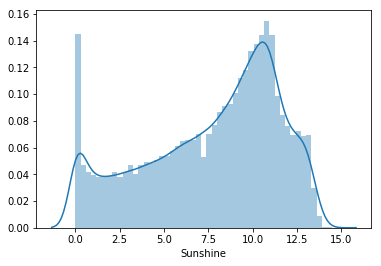

In [14]:
sns.distplot(df['Sunshine'])

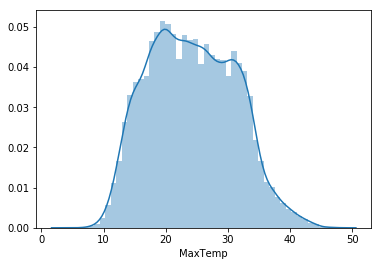

In [15]:
sns.distplot(df['MaxTemp'])

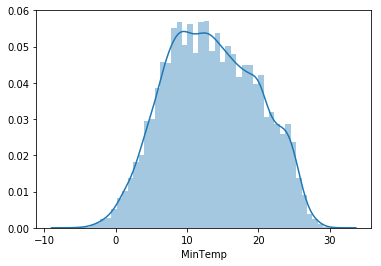

In [16]:
sns.distplot(df['MinTemp'])

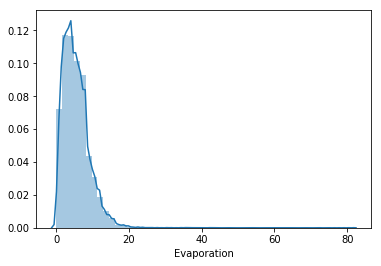

In [17]:
sns.distplot(df['Evaporation'])

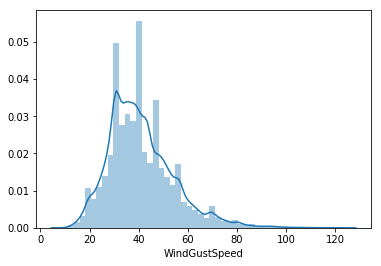

In [18]:
sns.distplot(df['WindGustSpeed'])

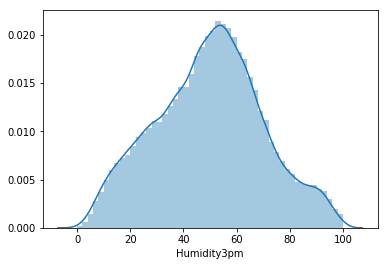

In [19]:
sns.distplot(df['Humidity3pm'])

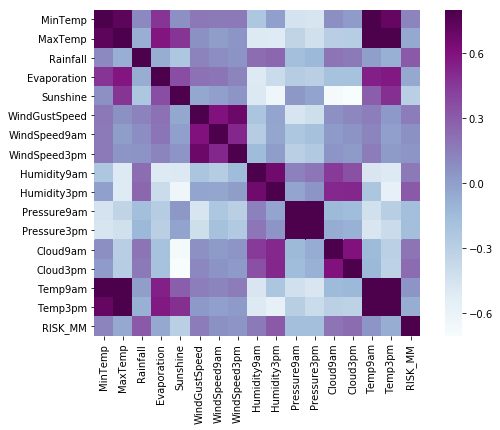

In [20]:
# Bivariate Analysis
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [21]:
# Much corellation between the data

In [22]:
# Mutivariant analysis 

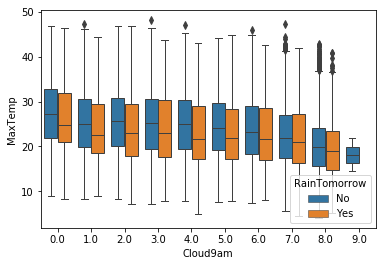

In [23]:
sns.boxplot(x="Cloud9am", y="MaxTemp", hue="RainTomorrow", data=train ,linewidth=1)

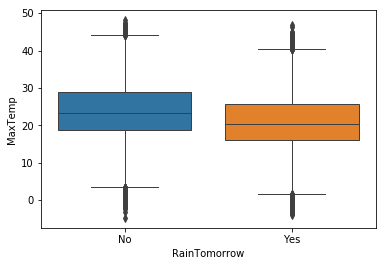

In [24]:
sns.boxplot(x="RainTomorrow", y="MaxTemp", data=train ,linewidth=1)

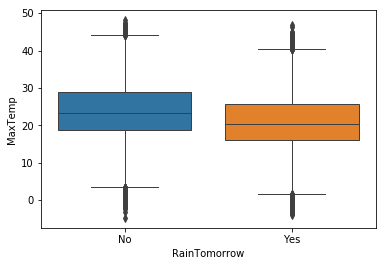

In [25]:
sns.boxplot(x="RainTomorrow", y="MaxTemp", data=train ,linewidth=1)

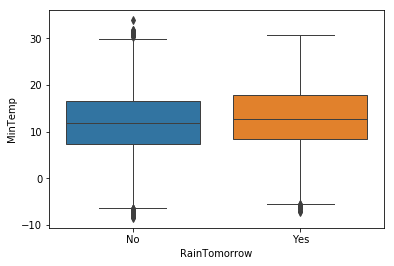

In [26]:
sns.boxplot(x="RainTomorrow", y="MinTemp", data=train ,linewidth=1)

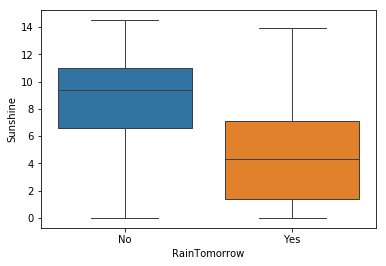

In [27]:
sns.boxplot(x="RainTomorrow", y="Sunshine", data=train ,linewidth=1)

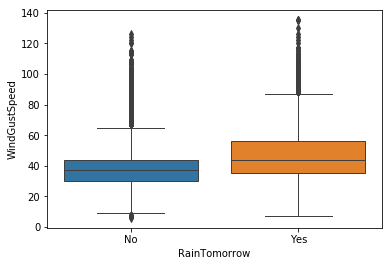

In [28]:
sns.boxplot(x="RainTomorrow", y="WindGustSpeed", data=train ,linewidth=1)

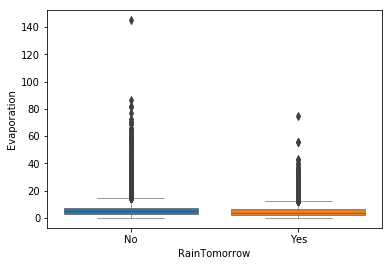

In [29]:
sns.boxplot(x="RainTomorrow", y="Evaporation", data=train ,linewidth=.5)
# Missing Values Treatment

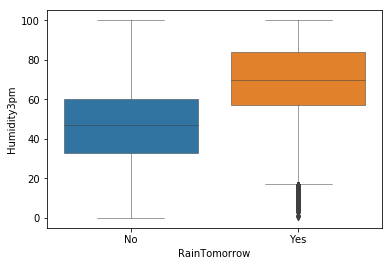

In [30]:
sns.boxplot(x="RainTomorrow", y="Humidity3pm", data=train ,linewidth=.5)

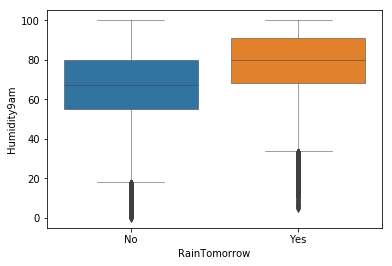

In [31]:
sns.boxplot(x="RainTomorrow", y="Humidity9am", data=train ,linewidth=.5)

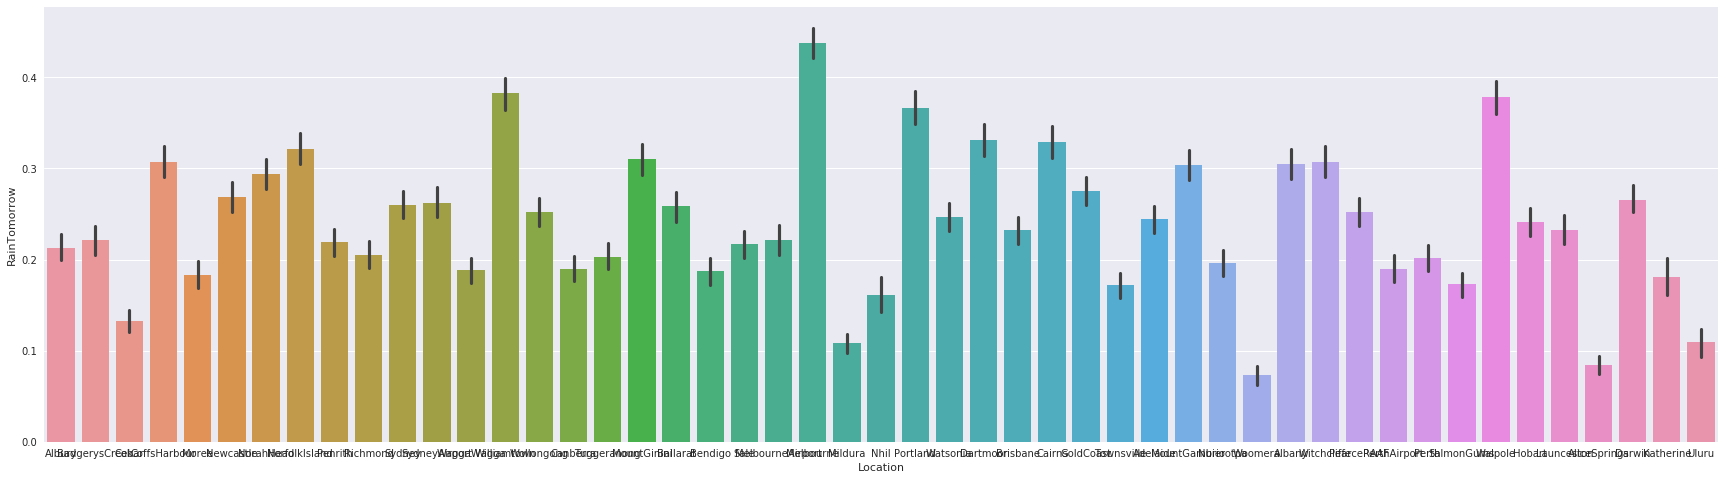

In [57]:
sns.set(rc={'figure.figsize':(30,8)})
sns.barplot(x="Location", y="RainTomorrow", data=train ,linewidth=.5)

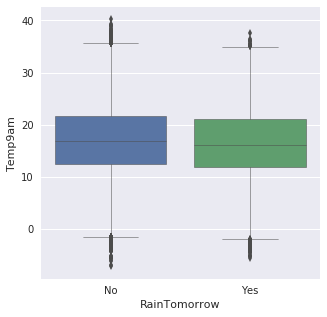

In [32]:
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot(y="Temp9am", x="RainTomorrow", data=train ,linewidth=.5)

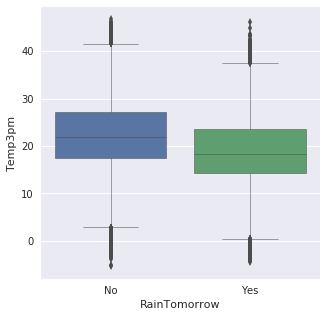

In [33]:
sns.boxplot(y="Temp3pm", x="RainTomorrow", data=train ,linewidth=.5)

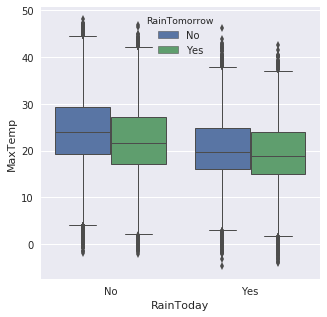

In [34]:
sns.boxplot(x="RainToday", y="MaxTemp", hue="RainTomorrow", data=train ,linewidth=1)

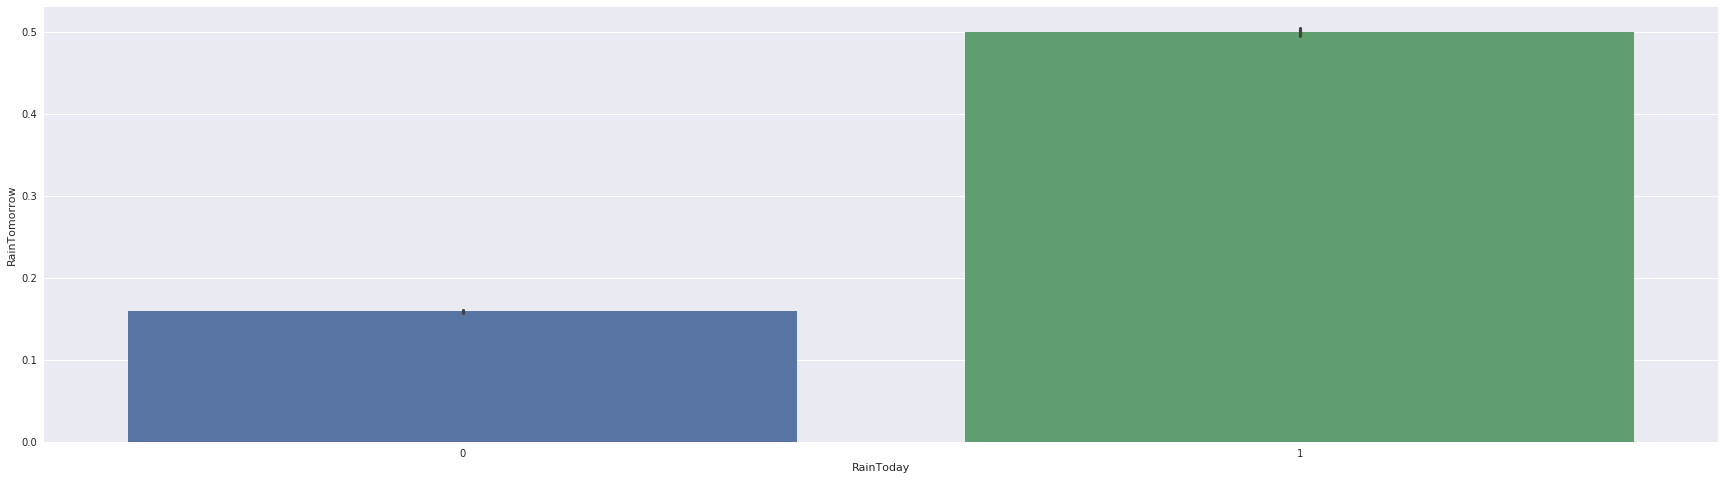

In [58]:
sns.barplot(x="RainToday", y="RainTomorrow", data=train ,linewidth=.5)

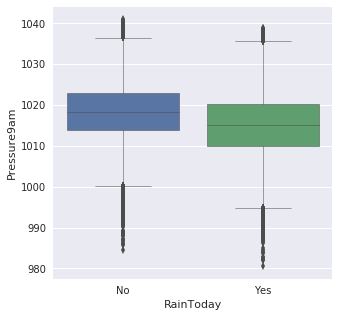

In [36]:
sns.boxplot(x="RainToday", y="Pressure9am", data=train ,linewidth=.5)

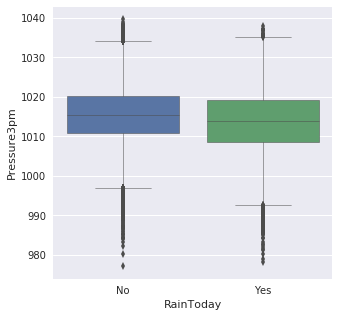

In [37]:
sns.boxplot(x="RainToday", y="Pressure3pm", data=train ,linewidth=.5)

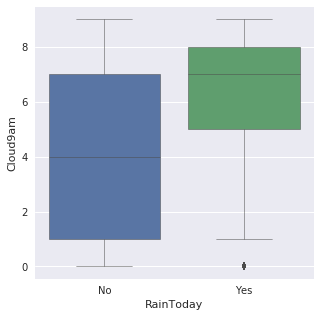

In [38]:
sns.boxplot(x="RainToday", y="Cloud9am", data=train ,linewidth=.5)

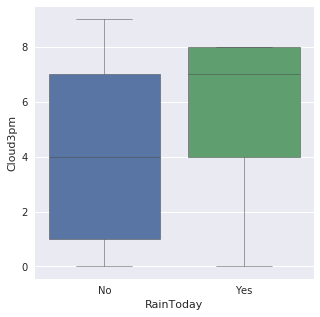

In [39]:
sns.boxplot(x="RainToday", y="Cloud3pm", data=train ,linewidth=.5)

In [40]:

# Check the number of missing values in each variable
train.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RISK_MM           3267
RainTomorrow      3267
dtype: int64

In [41]:
# except location and date rest all the columns have missing values

In [42]:
df=train.copy()

In [43]:
def f(x):
    if(len(str(x))==3):
        
        return 1
    else:
        return 0
df.RainTomorrow=df.RainTomorrow.apply(lambda x :f(x) )
df.RainToday=df.RainToday.apply(lambda x :f(x) )
df.Date=df.Date.apply(lambda x :str(x).replace("-"," ")[4:])

In [44]:
df=df.assign(month=df.Date.apply(lambda x :int(str(x)[0:3])))
df=df.assign(ID=np.arange(len(df)))
df.head()
# df.assign(date=df.Date.apply(lambda x :str(x)[0:3]))
# del df['Date']

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,month,ID
0,12 01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,0,0.0,0,12,0
1,12 02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,0,0.0,0,12,1
2,12 03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,0,0.0,0,12,2
3,12 04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,0,1.0,0,12,3
4,12 05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,0,0.2,0,12,4


In [45]:
del df['Date']
df=df.dropna(subset=['RainToday','RainTomorrow'])


In [46]:
df[['MinTemp', 'MaxTemp','Rainfall','Evaporation','Sunshine','WindSpeed9am','WindSpeed3pm','WindGustSpeed']] = df.groupby(['Location', 'month','RainToday'])['MinTemp', 'MaxTemp','Rainfall','Evaporation','Sunshine','WindSpeed9am','WindSpeed3pm','WindGustSpeed'].transform(lambda x: x.fillna(x.median()))
df[['Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']] = df.groupby(['Location', 'month','RainToday'])['Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']\
    .transform(lambda x: x.fillna(x.median()))
    
df.isnull().sum()

Location             0
MinTemp              1
MaxTemp              1
Rainfall             1
Evaporation      46736
Sunshine         53193
WindGustDir      10326
WindGustSpeed     6080
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          1
Humidity3pm          8
Pressure9am      12119
Pressure3pm      12119
Cloud9am         34968
Cloud3pm         34976
Temp9am              1
Temp3pm              8
RainToday            0
RISK_MM           3267
RainTomorrow         0
month                0
ID                   0
dtype: int64

In [47]:
df[['MinTemp', 'MaxTemp','Rainfall','Evaporation','Sunshine','WindSpeed9am','WindSpeed3pm','WindGustSpeed']] = df.groupby(['Location', 'RainToday'])['MinTemp', 'MaxTemp','Rainfall','Evaporation','Sunshine','WindSpeed9am','WindSpeed3pm','WindGustSpeed'].transform(lambda x: x.fillna(x.median()))

df[['Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']] = df.groupby(['Location', 'RainToday'])['Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']\
    .transform(lambda x: x.fillna(x.median()))

df.isnull().sum()

Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      45511
Sunshine         53169
WindGustDir      10326
WindGustSpeed     6079
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am      12119
Pressure3pm      12119
Cloud9am         34967
Cloud3pm         34967
Temp9am              0
Temp3pm              0
RainToday            0
RISK_MM           3267
RainTomorrow         0
month                0
ID                   0
dtype: int64

In [48]:
df[['MinTemp', 'MaxTemp','Rainfall','Evaporation','Sunshine','WindSpeed9am','WindSpeed3pm','WindGustSpeed']] = df.groupby(['RainToday', 'month'])['MinTemp', 'MaxTemp','Rainfall','Evaporation','Sunshine','WindSpeed9am','WindSpeed3pm','WindGustSpeed'].transform(lambda x: x.fillna(x.median()))

df[['Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']] = df.groupby(['RainToday', 'month'])['Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']\
    .transform(lambda x: x.fillna(x.median()))

df.isnull().sum()

Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday            0
RISK_MM           3267
RainTomorrow         0
month                0
ID                   0
dtype: int64

In [49]:
# categorical data 
df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace=True)
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0], inplace=True)
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0], inplace=True)
df.isnull().sum()


Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RISK_MM          3267
RainTomorrow        0
month               0
ID                  0
dtype: int64

In [50]:
del df['RISK_MM']

In [51]:

train = df 

test = df.sample(8000)

train=train[train.ID.isin(test.ID) == False]

del train['ID']
del test['ID']


In [52]:
# train=train.apply(preprocessing.LabelEncoder().fit_transform)
y = (train.RainTomorrow)
X = train.drop('RainTomorrow',1)
y1=(test.RainTomorrow)
test=test.drop('RainTomorrow',1)


In [53]:
# print(train.head(20))

In [54]:
X=X.apply(preprocessing.LabelEncoder().fit_transform)
test=test.apply(preprocessing.LabelEncoder().fit_transform)


In [55]:
# print(np.isfinite(X).all())
# Logistic regression using 10 fold stratified cross validation
i=1
kf = KFold(n_splits=20, random_state=None, shuffle=True)
X=np.array(X)
y=np.array(y)
test=np.array(test)
y1=np.array(y1)

for train_index,test_index in kf.split(X):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X[train_index],X[test_index]
     ytr,yvl = y[train_index],y[test_index]
        
     model = LogisticRegression(random_state=1)
     model.fit(xtr, ytr)
     pred=model.predict_proba(xvl)[:,1]
     score = roc_auc_score(yvl,pred)
     print('roc_auc_score',score)
     i+=1



1 of kfold 20
roc_auc_score 0.854628958607

2 of kfold 20
roc_auc_score 0.849313373922

3 of kfold 20
roc_auc_score 0.853743240708

4 of kfold 20
roc_auc_score 0.844906630884

5 of kfold 20
roc_auc_score 0.848232285843

6 of kfold 20
roc_auc_score 0.844357924473

7 of kfold 20
roc_auc_score 0.851740044781

8 of kfold 20
roc_auc_score 0.858028278309

9 of kfold 20
roc_auc_score 0.856309031082

10 of kfold 20
roc_auc_score 0.847997720124

11 of kfold 20
roc_auc_score 0.858351840848

12 of kfold 20
roc_auc_score 0.858087816978

13 of kfold 20
roc_auc_score 0.851776162878

14 of kfold 20
roc_auc_score 0.852826533198

15 of kfold 20
roc_auc_score 0.861505780287

16 of kfold 20
roc_auc_score 0.85858247876

17 of kfold 20
roc_auc_score 0.844274825939

18 of kfold 20
roc_auc_score 0.852058124798

19 of kfold 20
roc_auc_score 0.86090847185

20 of kfold 20
roc_auc_score 0.85358305378


In [56]:
 pred=model.predict_proba(test)[:,1]
 score = roc_auc_score(y1,pred)
 print('roc_auc_score',score)

roc_auc_score 0.851379960177
